**Garman Kohlhagen FX option pricing model**
 
FX currency option gives the right (not the obligation) to exchange money denominated in one currency into another currency on agreed time at agreed price (exchange rate). 

- Companies use FX options to hedge currency volatility in international trade, to minimize losses because of currencies volatility. 
- Financial institutions and funds use options to speculate for profit, also for strategy hedging.

*GK model is an extention of Black-Scholes model, where GK added two interest rates: domestic and foreign.* 

**The domestic currency value of a Call option into the foreign currency is:**

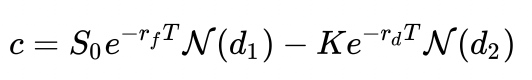

**The value of a Put option:**

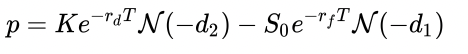

*where:*

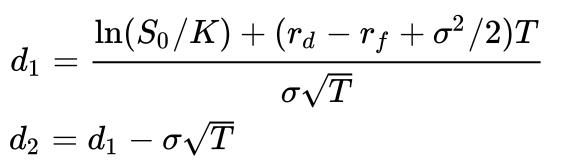

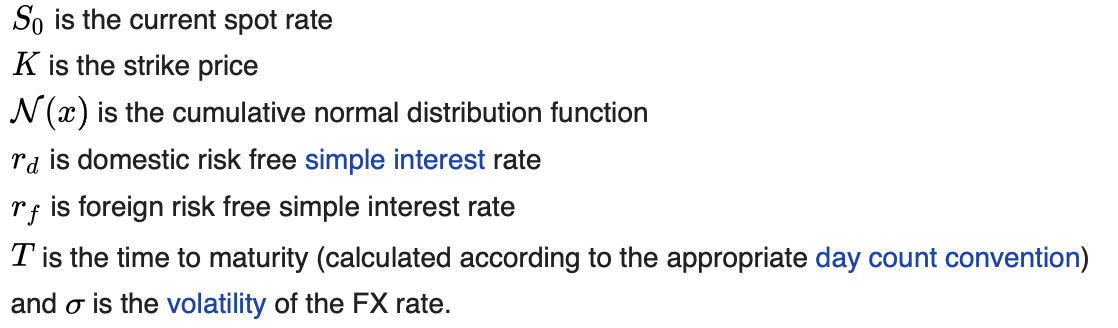

**1. For model implementation in Python we need to import libraries:**

In [1]:
import numpy as np
import scipy.stats as si
from scipy.stats import norm #for normal distribution
from collections import Counter

**2. Set parameters for GK model**

In this example we will use call options on USDEUR:

N1 call option with 90% ATM strike
N2 call option with 110$ ATM strike

In [2]:
s = 1.0064 # current spot rate USDEUR
k1 = 0.90576 #strike price 90% ATM of first call option N1
k2 = 1.10704 #strike price 110% ATM of second call option N2
r_d = 0.02 # domestic risk free rate EU
r_f = 0.04 # foreign risk free rate USA
t = 365/365 #maturity
sigma = 0.25 #volatility of the FX rate on USDEUR

**3. Define a function for calculating a price of Call option using GK formula:**

In [3]:
# Define a function for N1 call option:

def gk(s, k1, r_d, f_r, t, sigma, type="Call"):
    "Calculate GK option price for a call"
    
    d1 = (np.log(s/k1) + (r_d - r_f + sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2 = (np.log(s/k1) + (r_d - r_f - sigma**2/2)*t)/(sigma*np.sqrt(t))
    
    try:
        if type == "Call":
            price = s*np.exp(-r_f*t)*norm.cdf(d1, 0, 1) - k1*np.exp(-r_d*t)*norm.cdf(d2, 0, 1)
        elif type == "Put":
            price = k1*np.exp(-r_d*t)*norm.cdf(-d2, 0, 1) - s*np.exp(-r_d*t)*norm.cdf(-d1, 0, 1)
        return price
    except:
            print("Please confirm all option parameters above!")

In [4]:
# Define a function for N2 call option:


def gk2(s, k2, r_d, f_r, t, sigma, type="Call"):
    "Calculate GK option price for a call"
    
    d1 = (np.log(s/k2) + (r_d - r_f + sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2 = (np.log(s/k2) + (r_d - r_f - sigma**2/2)*t)/(sigma*np.sqrt(t))
    
    try:
        if type == "Call":
            price = s*np.exp(-r_f*t)*norm.cdf(d1, 0, 1) - k2*np.exp(-r_d*t)*norm.cdf(d2, 0, 1)
        elif type == "Put":
            price = k2*np.exp(-r_d*t)*norm.cdf(-d2, 0, 1) - s*np.exp(-r_d*t)*norm.cdf(-d1, 0, 1)
        return price
    except:
            print("Please confirm all option parameters above!")

In [5]:
print("The fair price of N1 option is: €{:.5}".format(gk(s, k1,r_d, r_f, t, sigma, type="Call")))

The fair price of N1 option is: €0.1371


In [6]:
print("The fair price of N2 option is: €{:.5}".format(gk2(s, k2,r_d, r_f, t, sigma, type="Call")))

The fair price of N2 option is: €0.053574


**4. We need to import libraries to calculate the Greeks of options:**

In [7]:
import math
from scipy.stats import norm
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho

**Delta**

In [8]:
# Define a function for N1 call option:

def delta_calc(r_d, s, k1, t, sigma, type="Call"):
    "Calculate Delta of an option"
    d1 = (np.log(s/k1) + (r_d + sigma**2/2)*t)/(sigma*np.sqrt(t))
    
    try:
        if type == "Call":
            delta_calc = norm.cdf(d1, 0, 1)
        return delta_calc, delta(type, s, k1, t, r_d, sigma) 
    except:
            print("Please confirm all option parameters above!")

In [9]:
# Define a function for N2 call option:

def delta_calc2(r_d, s, k2, t, sigma, type="Call"):
    "Calculate Delta of an option"
    d1 = (np.log(s/k2) + (r_d + sigma**2/2)*t)/(sigma*np.sqrt(t))
    
    try:
        if type == "Call":
            delta_calc = norm.cdf(d1, 0, 1)
        return delta_calc, delta(type, s, k2, t, r_d, sigma) 
    except:
            print("Please confirm all option parameters above!")

**Gamma**

In [10]:
# Define a function for N1 call option:

def gamma_calc(r_d, s, k1, t, sigma, type="Call"):
    "Calculate gamma of an option"
    d1 = (np.log(s/k1) + (r_d + sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(s*sigma*np.sqrt(t))
        return gamma_calc, gamma(type, s, k1, t, r_d, sigma)
    except:
            print("Please confirm all option parameters above!")

In [11]:
# Define a function for N2 call option:

def gamma_calc2(r_d, s, k2, t, sigma, type="Call"):
    "Calculate gamma of an option"
    d1 = (np.log(s/k2) + (r_d + sigma**2/2)*t)/(sigma*np.sqrt(t))
    d2 = d1 - sigma*np.sqrt(t)
    
    try:
        gamma_calc = norm.pdf(d1, 0, 1)/(s*sigma*np.sqrt(t))
        return gamma_calc, gamma(type, s, k2, t, r_d, sigma)
    except:
            print("Please confirm all option parameters above!")

In [12]:
print("Delta1: ", [round(x,3) for x in delta_calc(r_d, s, k1, t, sigma, type="Call")])

Delta1:  [0.734, 0.734]


In [13]:
print("Delta2: ", [round(x,3) for x in delta_calc2(r_d, s, k2, t, sigma, type="Call")])

Delta2:  [0.43, 0.43]


In [14]:
print("Gamma1: ", [round(x,3) for x in gamma_calc(r_d, s, k1, t, sigma, type="Call")])

Gamma1:  [1.303, 1.303]


In [15]:
print("Gamma2: ", [round(x,3) for x in gamma_calc2(r_d, s, k2, t, sigma, type="Call")])

Gamma2:  [1.561, 1.561]
